In [1]:
import cv2
import matplotlib.pyplot as plt
import transform
import threshold
import window

%matplotlib inline

In [2]:
img = cv2.cvtColor(cv2.imread("test_images/straight_lines1.jpg"), cv2.COLOR_BGR2RGB)
M, Minv = transform.get_perspective_transform()
img_warped = transform.warp(img, M)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 10))
ax1.set_title("Source")
ax1.imshow(img)
ax2.set_title("Warped")
ax2.imshow(img_warped)
f.show()

/opt/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


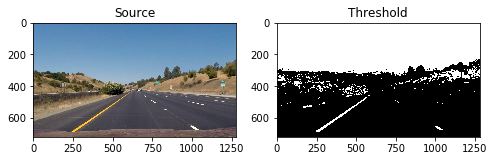

In [3]:
image = cv2.cvtColor(cv2.imread("test_images/straight_lines1.jpg"), cv2.COLOR_BGR2RGB)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 10))
ax1.set_title("Source")
ax1.imshow(image)
ax2.set_title("Threshold")
ax2.imshow(threshold.hls_threshold_s_img(image, 90, 255), cmap='gray')

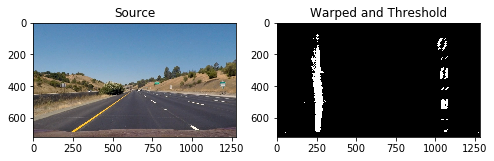

In [4]:
img = cv2.cvtColor(cv2.imread("test_images/straight_lines1.jpg"), cv2.COLOR_BGR2RGB)
M, Minv = transform.get_perspective_transform()
img_warped = transform.warp(img, M)
img_hls_thresh = threshold.hls_threshold_s_img(img_warped)
img_sobel_thresh = threshold.sobel_threshold_x_img(img_warped)
img_thresh = threshold.combine_binary(img_hls_thresh, img_sobel_thresh)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 10))
ax1.set_title("Source")
ax1.imshow(img)
ax2.set_title("Warped and Threshold")
ax2.imshow(img_thresh, cmap='gray')

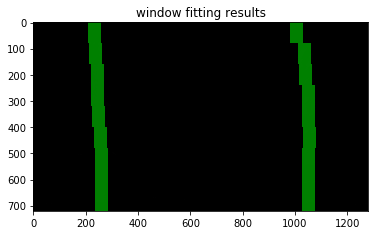

In [5]:
centroids = window.find_window_centroids(img_thresh)
output = window.draw_mask(img_thresh, centroids)
plt.imshow(output)
plt.title('window fitting results')
plt.show()

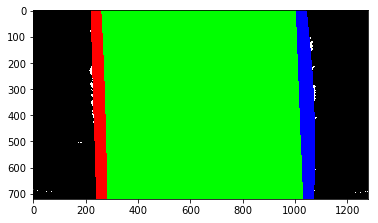

In [6]:
left_fit, right_fit = window.fit_polynomial(img_thresh)
out_img = window.draw_lane_lines(img_thresh, left_fit, right_fit)
plt.imshow(out_img)